In [ ]:
!pip install isbnlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import isbnlib
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from progressbar import ProgressBar
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")
print('Libraries imported!')

Libraries imported!


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/ML project/book_info.csv', error_bad_lines = False)
df = df.drop(columns=['Unnamed: 0'])
df


,id,Book_Name,Writer_Name,Category,Rating,Review,Site,sentiment,label,Book_name_without_spaces
0,96523,মুনতাখাব হাদীস,মাওলানা মোঃ সাখাওয়াত উল্লাহ,হাদিস ও সুন্নাত,1,(১) বই টি শত শত জাল হাদিসে ভরপুর । (২) দ্বীন ...,Rokomari,negative,0,মুনতাখাবহাদীস
1,39118,মেঘাচ্ছন্ন ঈমান (পেপারব্যাক),শাইখ আব্দুল মালিক আল কাসিম,"ঈমান, আক্বিদা ও তাওবাহ",1,"বই রিভিউ : মেঘাচ্ছন্ন ঈমান পাঠ অনুভূতি: ""একটি...",Rokomari,negative,0,মেঘাচ্ছন্নঈমান(পেপারব্যাক)
2,141682,সামষ্টিক অর্থনীতি (পার্স কোর্স দ্বিতীয় বর্ষের...,সুকেশ চন্দ্র জোয়ারদার,ডিগ্রি,1,পড়তে চাই,Rokomari,negative,0,সামষ্টিকঅর্থনীতি(পার্সকোর্সদ্বিতীয়বর্ষের-৩য়পত্...
3,136770,ছাত্রলীগের ইতিহাস বাংলাদেশের ইতিহাস (১৯৪৮-১৯৭...,সাইফুর রহমান সোহাগ,প্রসঙ্গ: বাংলাদেশের রাজনীতি,1,ঠিক আছে,Rokomari,negative,0,ছাত্রলীগেরইতিহাসবাংলাদেশেরইতিহাস(১৯৪৮-১৯৭০প্রথ...
4,82740,"এসএসসি বিজ্ঞান মেইড ইজি প্রশ্নপত্র, সকল শিক্ষ...",পাঞ্জেরী সম্পাদনা পর্ষদ (সম্পাদক),নবম ও দশম (এসএসসি): বিজ্ঞান বিভাগ পাঠ্য সহায়...,1,এটি এসএসসি শিক্ষার্থীর 2020 এর জন্য একটি পরীক্...,Rokomari,negative,0,"এসএসসিবিজ্ঞানমেইডইজিপ্রশ্নপত্র,সকলশিক্ষাবোর্ড,..."
...,...,...,...,...,...,...,...,...,...,...
6306,21943,"তিমির প্রেম, সপ্ত আতঙ্ক, লর্না ডুন (পেপারব্যা...",আর. ডি. ব্ল্যাকমোর,"রহস্য, গোয়েন্দা, ভৌতিক, মিথ, থ্রিলার, ও অ্যাড...",5,এই সংগ্রহটি তিনটি দুর্দান্ত ক্লাসিক উপন্যাস নি...,Rokomari,positive,2,"তিমিরপ্রেম,সপ্তআতঙ্ক,লর্নাডুন(পেপারব্যাক)তিনটি..."
6307,51194,Guinness World Records 2020 (Hardcover),Guinness World Records (Editor),"Foreign Language Books: Essay, Articles & Res...",5,ভাল বই,Rokomari,positive,2,GuinnessWorldRecords2020(Hardcover)
6308,35327,খুন (হার্ডকভার),আহমেদ ফারুক,সমকালীন উপন্যাস,5,সম্পূর্ণ প্রাপ্তবয়স্কদের বই। তবে দুর্দান্ত গল...,Rokomari,positive,2,খুন(হার্ডকভার)
6309,8262,একাত্তর এবং মুক্তিযোদ্ধা পরিবার (হার্ডকভার),আওলিয়া খানম,"মুক্তিযুদ্ধের ডায়েরি, চিঠি ও স্মৃতিচারণ",5,"এটি ""সাহিত্য কথা"" প্রকাশনী হতে প্রকাশিত একটি অ...",Rokomari,positive,2,একাত্তরএবংমুক্তিযোদ্ধাপরিবার(হার্ডকভার)


In [ ]:
# print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

In [ ]:
book_count = df.groupby('Writer_Name')['Book_Name'].count().reset_index().sort_values('Book_Name', ascending=False).head(20).set_index('Writer_Name')
book_count

,Book_Name
Writer_Name,
হুমায়ূন আহমেদ,79
মুহম্মদ জাফর ইকবাল,69
রকিব হাসান,43
সুনীল গঙ্গোপাধ্যায় (নীললোহিত),36
কাজী আনোয়ার হোসেন,31
আনিসুল হক,23
সমরেশ মজুমদার,22
حكيم الامت مولانا اشرف علي تهانوي رح ( হাকীমুল উম্মত মাওলানা আশরাফ আলী থানভী রহ.),21
মোশতাক আহমেদ,21


In [ ]:
df1 = pd.read_csv(r'/content/drive/MyDrive/ML project/user_info.csv', error_bad_lines = False)
df1 = df1.drop(columns=['Unnamed: 0'])
df1
calculateCount = df1[['book_id']].copy()
calculateCount

data = np.zeros((1, calculateCount.shape[0]))
x = 0;
for index, row in df1.iterrows():
  for x in row:
    if(x >=1 and x<= 5):
      data[0][index]+=1
df['ratings_count'] = data[0]

df

,id,Book_Name,Writer_Name,Category,Rating,Review,Site,sentiment,label,Book_name_without_spaces,ratings_count
0,96523,মুনতাখাব হাদীস,মাওলানা মোঃ সাখাওয়াত উল্লাহ,হাদিস ও সুন্নাত,1,(১) বই টি শত শত জাল হাদিসে ভরপুর । (২) দ্বীন ...,Rokomari,negative,0,মুনতাখাবহাদীস,98.0
1,39118,মেঘাচ্ছন্ন ঈমান (পেপারব্যাক),শাইখ আব্দুল মালিক আল কাসিম,"ঈমান, আক্বিদা ও তাওবাহ",1,"বই রিভিউ : মেঘাচ্ছন্ন ঈমান পাঠ অনুভূতি: ""একটি...",Rokomari,negative,0,মেঘাচ্ছন্নঈমান(পেপারব্যাক),27.0
2,141682,সামষ্টিক অর্থনীতি (পার্স কোর্স দ্বিতীয় বর্ষের...,সুকেশ চন্দ্র জোয়ারদার,ডিগ্রি,1,পড়তে চাই,Rokomari,negative,0,সামষ্টিকঅর্থনীতি(পার্সকোর্সদ্বিতীয়বর্ষের-৩য়পত্...,75.0
3,136770,ছাত্রলীগের ইতিহাস বাংলাদেশের ইতিহাস (১৯৪৮-১৯৭...,সাইফুর রহমান সোহাগ,প্রসঙ্গ: বাংলাদেশের রাজনীতি,1,ঠিক আছে,Rokomari,negative,0,ছাত্রলীগেরইতিহাসবাংলাদেশেরইতিহাস(১৯৪৮-১৯৭০প্রথ...,51.0
4,82740,"এসএসসি বিজ্ঞান মেইড ইজি প্রশ্নপত্র, সকল শিক্ষ...",পাঞ্জেরী সম্পাদনা পর্ষদ (সম্পাদক),নবম ও দশম (এসএসসি): বিজ্ঞান বিভাগ পাঠ্য সহায়...,1,এটি এসএসসি শিক্ষার্থীর 2020 এর জন্য একটি পরীক্...,Rokomari,negative,0,"এসএসসিবিজ্ঞানমেইডইজিপ্রশ্নপত্র,সকলশিক্ষাবোর্ড,...",77.0
...,...,...,...,...,...,...,...,...,...,...,...
6306,21943,"তিমির প্রেম, সপ্ত আতঙ্ক, লর্না ডুন (পেপারব্যা...",আর. ডি. ব্ল্যাকমোর,"রহস্য, গোয়েন্দা, ভৌতিক, মিথ, থ্রিলার, ও অ্যাড...",5,এই সংগ্রহটি তিনটি দুর্দান্ত ক্লাসিক উপন্যাস নি...,Rokomari,positive,2,"তিমিরপ্রেম,সপ্তআতঙ্ক,লর্নাডুন(পেপারব্যাক)তিনটি...",33.0
6307,51194,Guinness World Records 2020 (Hardcover),Guinness World Records (Editor),"Foreign Language Books: Essay, Articles & Res...",5,ভাল বই,Rokomari,positive,2,GuinnessWorldRecords2020(Hardcover),39.0
6308,35327,খুন (হার্ডকভার),আহমেদ ফারুক,সমকালীন উপন্যাস,5,সম্পূর্ণ প্রাপ্তবয়স্কদের বই। তবে দুর্দান্ত গল...,Rokomari,positive,2,খুন(হার্ডকভার),93.0
6309,8262,একাত্তর এবং মুক্তিযোদ্ধা পরিবার (হার্ডকভার),আওলিয়া খানম,"মুক্তিযুদ্ধের ডায়েরি, চিঠি ও স্মৃতিচারণ",5,"এটি ""সাহিত্য কথা"" প্রকাশনী হতে প্রকাশিত একটি অ...",Rokomari,positive,2,একাত্তরএবংমুক্তিযোদ্ধাপরিবার(হার্ডকভার),61.0


In [ ]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
id                           0
Book_Name                    0
Writer_Name                 17
Category                     3
Rating                       0
Review                       0
Site                         0
sentiment                    0
label                        0
Book_name_without_spaces     0
ratings_count                0
dtype: int64


In [ ]:
df = df.dropna()
df = df.reset_index()

df

,index,id,Book_Name,Writer_Name,Category,Rating,Review,Site,sentiment,label,Book_name_without_spaces,ratings_count
0,0,96523,মুনতাখাব হাদীস,মাওলানা মোঃ সাখাওয়াত উল্লাহ,হাদিস ও সুন্নাত,1,(১) বই টি শত শত জাল হাদিসে ভরপুর । (২) দ্বীন ...,Rokomari,negative,0,মুনতাখাবহাদীস,98.0
1,1,39118,মেঘাচ্ছন্ন ঈমান (পেপারব্যাক),শাইখ আব্দুল মালিক আল কাসিম,"ঈমান, আক্বিদা ও তাওবাহ",1,"বই রিভিউ : মেঘাচ্ছন্ন ঈমান পাঠ অনুভূতি: ""একটি...",Rokomari,negative,0,মেঘাচ্ছন্নঈমান(পেপারব্যাক),27.0
2,2,141682,সামষ্টিক অর্থনীতি (পার্স কোর্স দ্বিতীয় বর্ষের...,সুকেশ চন্দ্র জোয়ারদার,ডিগ্রি,1,পড়তে চাই,Rokomari,negative,0,সামষ্টিকঅর্থনীতি(পার্সকোর্সদ্বিতীয়বর্ষের-৩য়পত্...,75.0
3,3,136770,ছাত্রলীগের ইতিহাস বাংলাদেশের ইতিহাস (১৯৪৮-১৯৭...,সাইফুর রহমান সোহাগ,প্রসঙ্গ: বাংলাদেশের রাজনীতি,1,ঠিক আছে,Rokomari,negative,0,ছাত্রলীগেরইতিহাসবাংলাদেশেরইতিহাস(১৯৪৮-১৯৭০প্রথ...,51.0
4,4,82740,"এসএসসি বিজ্ঞান মেইড ইজি প্রশ্নপত্র, সকল শিক্ষ...",পাঞ্জেরী সম্পাদনা পর্ষদ (সম্পাদক),নবম ও দশম (এসএসসি): বিজ্ঞান বিভাগ পাঠ্য সহায়...,1,এটি এসএসসি শিক্ষার্থীর 2020 এর জন্য একটি পরীক্...,Rokomari,negative,0,"এসএসসিবিজ্ঞানমেইডইজিপ্রশ্নপত্র,সকলশিক্ষাবোর্ড,...",77.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6287,6306,21943,"তিমির প্রেম, সপ্ত আতঙ্ক, লর্না ডুন (পেপারব্যা...",আর. ডি. ব্ল্যাকমোর,"রহস্য, গোয়েন্দা, ভৌতিক, মিথ, থ্রিলার, ও অ্যাড...",5,এই সংগ্রহটি তিনটি দুর্দান্ত ক্লাসিক উপন্যাস নি...,Rokomari,positive,2,"তিমিরপ্রেম,সপ্তআতঙ্ক,লর্নাডুন(পেপারব্যাক)তিনটি...",33.0
6288,6307,51194,Guinness World Records 2020 (Hardcover),Guinness World Records (Editor),"Foreign Language Books: Essay, Articles & Res...",5,ভাল বই,Rokomari,positive,2,GuinnessWorldRecords2020(Hardcover),39.0
6289,6308,35327,খুন (হার্ডকভার),আহমেদ ফারুক,সমকালীন উপন্যাস,5,সম্পূর্ণ প্রাপ্তবয়স্কদের বই। তবে দুর্দান্ত গল...,Rokomari,positive,2,খুন(হার্ডকভার),93.0
6290,6309,8262,একাত্তর এবং মুক্তিযোদ্ধা পরিবার (হার্ডকভার),আওলিয়া খানম,"মুক্তিযুদ্ধের ডায়েরি, চিঠি ও স্মৃতিচারণ",5,"এটি ""সাহিত্য কথা"" প্রকাশনী হতে প্রকাশিত একটি অ...",Rokomari,positive,2,একাত্তরএবংমুক্তিযোদ্ধাপরিবার(হার্ডকভার),61.0


In [ ]:
df = df.drop(columns=['index'])

df

,id,Book_Name,Writer_Name,Category,Rating,Review,Site,sentiment,label,Book_name_without_spaces,ratings_count
0,96523,মুনতাখাব হাদীস,মাওলানা মোঃ সাখাওয়াত উল্লাহ,হাদিস ও সুন্নাত,1,(১) বই টি শত শত জাল হাদিসে ভরপুর । (২) দ্বীন ...,Rokomari,negative,0,মুনতাখাবহাদীস,98.0
1,39118,মেঘাচ্ছন্ন ঈমান (পেপারব্যাক),শাইখ আব্দুল মালিক আল কাসিম,"ঈমান, আক্বিদা ও তাওবাহ",1,"বই রিভিউ : মেঘাচ্ছন্ন ঈমান পাঠ অনুভূতি: ""একটি...",Rokomari,negative,0,মেঘাচ্ছন্নঈমান(পেপারব্যাক),27.0
2,141682,সামষ্টিক অর্থনীতি (পার্স কোর্স দ্বিতীয় বর্ষের...,সুকেশ চন্দ্র জোয়ারদার,ডিগ্রি,1,পড়তে চাই,Rokomari,negative,0,সামষ্টিকঅর্থনীতি(পার্সকোর্সদ্বিতীয়বর্ষের-৩য়পত্...,75.0
3,136770,ছাত্রলীগের ইতিহাস বাংলাদেশের ইতিহাস (১৯৪৮-১৯৭...,সাইফুর রহমান সোহাগ,প্রসঙ্গ: বাংলাদেশের রাজনীতি,1,ঠিক আছে,Rokomari,negative,0,ছাত্রলীগেরইতিহাসবাংলাদেশেরইতিহাস(১৯৪৮-১৯৭০প্রথ...,51.0
4,82740,"এসএসসি বিজ্ঞান মেইড ইজি প্রশ্নপত্র, সকল শিক্ষ...",পাঞ্জেরী সম্পাদনা পর্ষদ (সম্পাদক),নবম ও দশম (এসএসসি): বিজ্ঞান বিভাগ পাঠ্য সহায়...,1,এটি এসএসসি শিক্ষার্থীর 2020 এর জন্য একটি পরীক্...,Rokomari,negative,0,"এসএসসিবিজ্ঞানমেইডইজিপ্রশ্নপত্র,সকলশিক্ষাবোর্ড,...",77.0
...,...,...,...,...,...,...,...,...,...,...,...
6287,21943,"তিমির প্রেম, সপ্ত আতঙ্ক, লর্না ডুন (পেপারব্যা...",আর. ডি. ব্ল্যাকমোর,"রহস্য, গোয়েন্দা, ভৌতিক, মিথ, থ্রিলার, ও অ্যাড...",5,এই সংগ্রহটি তিনটি দুর্দান্ত ক্লাসিক উপন্যাস নি...,Rokomari,positive,2,"তিমিরপ্রেম,সপ্তআতঙ্ক,লর্নাডুন(পেপারব্যাক)তিনটি...",33.0
6288,51194,Guinness World Records 2020 (Hardcover),Guinness World Records (Editor),"Foreign Language Books: Essay, Articles & Res...",5,ভাল বই,Rokomari,positive,2,GuinnessWorldRecords2020(Hardcover),39.0
6289,35327,খুন (হার্ডকভার),আহমেদ ফারুক,সমকালীন উপন্যাস,5,সম্পূর্ণ প্রাপ্তবয়স্কদের বই। তবে দুর্দান্ত গল...,Rokomari,positive,2,খুন(হার্ডকভার),93.0
6290,8262,একাত্তর এবং মুক্তিযোদ্ধা পরিবার (হার্ডকভার),আওলিয়া খানম,"মুক্তিযুদ্ধের ডায়েরি, চিঠি ও স্মৃতিচারণ",5,"এটি ""সাহিত্য কথা"" প্রকাশনী হতে প্রকাশিত একটি অ...",Rokomari,positive,2,একাত্তরএবংমুক্তিযোদ্ধাপরিবার(হার্ডকভার),61.0


In [ ]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
id                          0
Book_Name                   0
Writer_Name                 0
Category                    0
Rating                      0
Review                      0
Site                        0
sentiment                   0
label                       0
Book_name_without_spaces    0
ratings_count               0
dtype: int64


In [ ]:
#Top 20 Highest Rated Books
most_rated_books = df.sort_values('ratings_count', ascending = False).head(20).set_index('Book_Name')
# plt.figure(figsize=(15,10))
# ax = sns.barplot(most_rated_books['ratings_count'], most_rated_books.index, palette='inferno')
# ax.set_title("Top 20 Highest Rated Books")
# ax.set_xlabel("Total Rates")
# for i in ax.patches:
#     ax.text(i.get_width()+.3, i.get_y()+0.3, str(round(i.get_width())), fontsize = 10, color = 'k')

most_rated_books

,id,Writer_Name,Category,Rating,Review,Site,sentiment,label,Book_name_without_spaces,ratings_count
Book_Name,,,,,,,,,,
জীবনে রোদ্দুরে,152597,সাবের চৌধুরী,বিবিধ বই,4,▪️না চাইতেই পেয়ে গেলাম যা: মুহাম্মাদ যাইনুল আব...,WafiLife,positive,2,জীবনেরোদ্দুরে,100.0
যাদের বিয়ে হবে (হার্ডকভার),66521,ড. পার্থ চট্টোপাধ্যায়,পশ্চিম বঙ্গের বই: স্বাস্থ্য বিষয়ক,3,বিয়ে সামজিক জীবনের এক গুরুত্বপূর্ণ অনুসঙ্গ। শু...,Rokomari,neutral,1,যাদেরবিয়েহবে(হার্ডকভার),100.0
ডায়াবেটিস : রোগ লক্ষণ ও প্রতিকার,3060,অধ্যাপক ডা. শুভাগত চৌধুরী,স্বাস্থ্যবিধি ও পরামর্শ,5,রোগ অনেকসময় মানুষের নিজের কারণেই হয়ে থাকে। অসত...,Rokomari,positive,2,ডায়াবেটিস:রোগলক্ষণওপ্রতিকার,100.0
অঙ্গার (হার্ডকভার),140357,সায়ীদা নুহা,থ্রিলার,3,হাঃ হাঃ হাঃ,Rokomari,neutral,1,অঙ্গার(হার্ডকভার),100.0
বঙ্গবন্ধুর রসবোধ (হার্ডকভার),114256,মোঃ ফয়সাল বিন আশিক,বঙ্গবন্ধু শেখ মুজিবুর রহমান,1,ভাল না,Rokomari,negative,0,বঙ্গবন্ধুররসবোধ(হার্ডকভার),100.0
সেনোনিয়মস এন্ড এন্টোনিয়মস উইথ প্রিপিক্স ও সাফিক্স (অষ্টম শ্রেণির জন্য) (Paperback),120901,মোহাম্মদ শহিদুল্লাহ,Class 8,3,ভাল বই,Rokomari,neutral,1,সেনোনিয়মসএন্ডএন্টোনিয়মসউইথপ্রিপিক্সওসাফিক্স(অষ...,100.0
"বুলবুল সরওয়ার ভ্রমণ ৭টি বই রকমারি কালেকশন (হার্ডকভার) স্বপ্নভ্রমণ জেরুসালেম, মহাভারতের পথে এক, ঝিলাম নদীর দেশ, ইস্তাম্বুল, ঝিলামে যখন ছিলাম, মহাভারতের পথে-২, মহাভারতের পথে-তিন",92068,বুলবুল সরওয়ার,নানাদেশ ও ভ্রমণ,4,আনাতোলিয়া। এশিয়া মাইনর।তুরস্ক। কত নামেই না তাক...,Rokomari,positive,2,বুলবুলসরওয়ারভ্রমণ৭টিবইরকমারিকালেকশন(হার্ডকভার)...,100.0
মেডিকেল ডেন্টাল সাজেশন MEDICAL SERIES,41348,এ.এস.এম আনাস ফেরদৌস,মেডিক্যাল ভর্তি প্রস্তুতি,3,বইয়ের ভাল।তবে আরও ভাল হতে পারে।আমি মনে করি এক...,Rokomari,neutral,1,মেডিকেলডেন্টালসাজেশনMEDICALSERIES,100.0
Prasiddha Alphabet (Hardcover) Baby's Beginner Alphabet Book with Images (Size : 4.1,84079,Prodip Roy,When 0-4: Primary Learning,5,প্রশংসনীয়,Rokomari,positive,2,PrasiddhaAlphabet(Hardcover)Baby'sBeginnerAlph...,100.0


In [ ]:
df['Writer_Name'].value_counts().head(20)

 হুমায়ূন আহমেদ                                                                         79
 মুহম্মদ জাফর ইকবাল                                                                    69
 রকিব হাসান                                                                            43
 সুনীল গঙ্গোপাধ্যায় (নীললোহিত)                                                        36
 কাজী আনোয়ার হোসেন                                                                     31
 আনিসুল হক                                                                             23
 সমরেশ মজুমদার                                                                         22
 حكيم الامت مولانا اشرف علي تهانوي رح ( হাকীমুল উম্মত মাওলানা আশরাফ আলী থানভী রহ.)     21
 মোশতাক আহমেদ                                                                          21
 আহসান হাবীব (কার্টুনিস্ট)                                                             18
 আগাথা ক্রিস্টি                                                                        17
 পাঞ্জেরী 

Text(0.5, 0, 'Average rating')

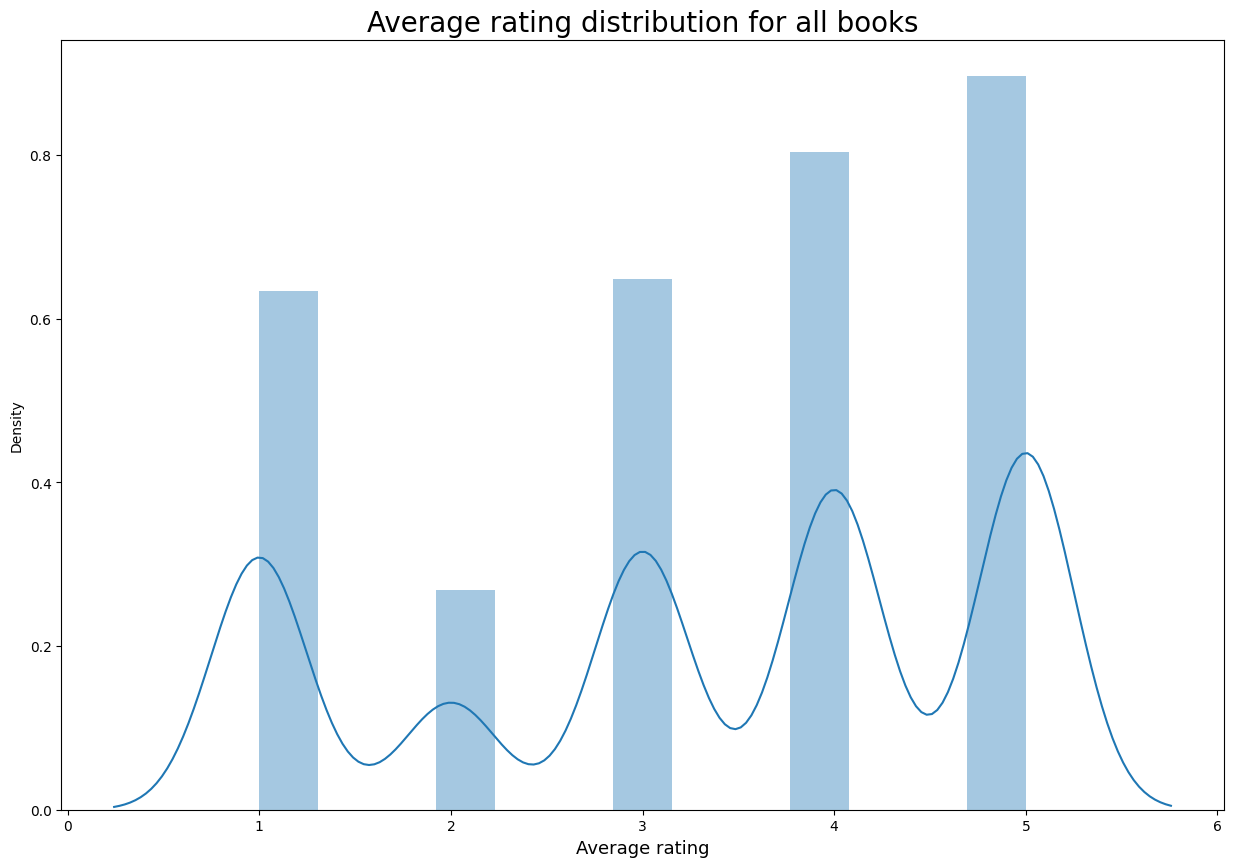

In [ ]:
df.Rating = df.Rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['Rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

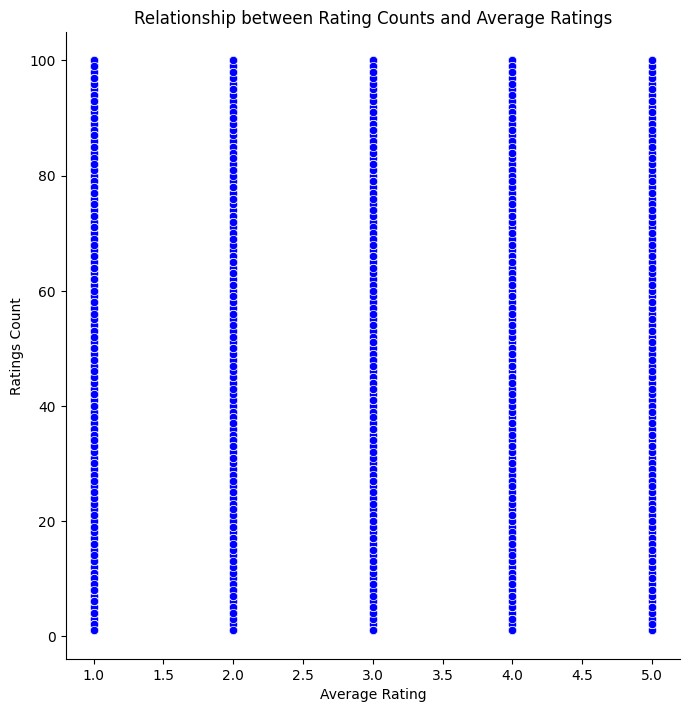

In [ ]:
#Relationship between Average Rating and Reviews Counts
ax = sns.relplot(x="Rating", y="ratings_count", data = df, color = 'blue',sizes=(100, 200), height=7, marker='o')
plt.title("Relationship between Rating Counts and Average Ratings",fontsize = 12)
ax.set_axis_labels("Average Rating", "Ratings Count")

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming df is your DataFrame and 'category' is the column you want to convert
# # Replace 'category' with your actual column name

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the 'category' column
# df['Category'] = label_encoder.fit_transform(df['Category'])

# # Display the DataFrame with the converted 'category' column
# print(df)


In [ ]:
trial = df[['Rating', 'ratings_count']]
data = np.asarray([np.asarray(trial['Rating']), np.asarray(trial['ratings_count'])]).T

data

array([[ 1., 98.],
       [ 1., 27.],
       [ 1., 75.],
       ...,
       [ 5., 93.],
       [ 5., 61.],
       [ 5., 51.]])

Text(0.5, 1.0, 'Elbow Curve')

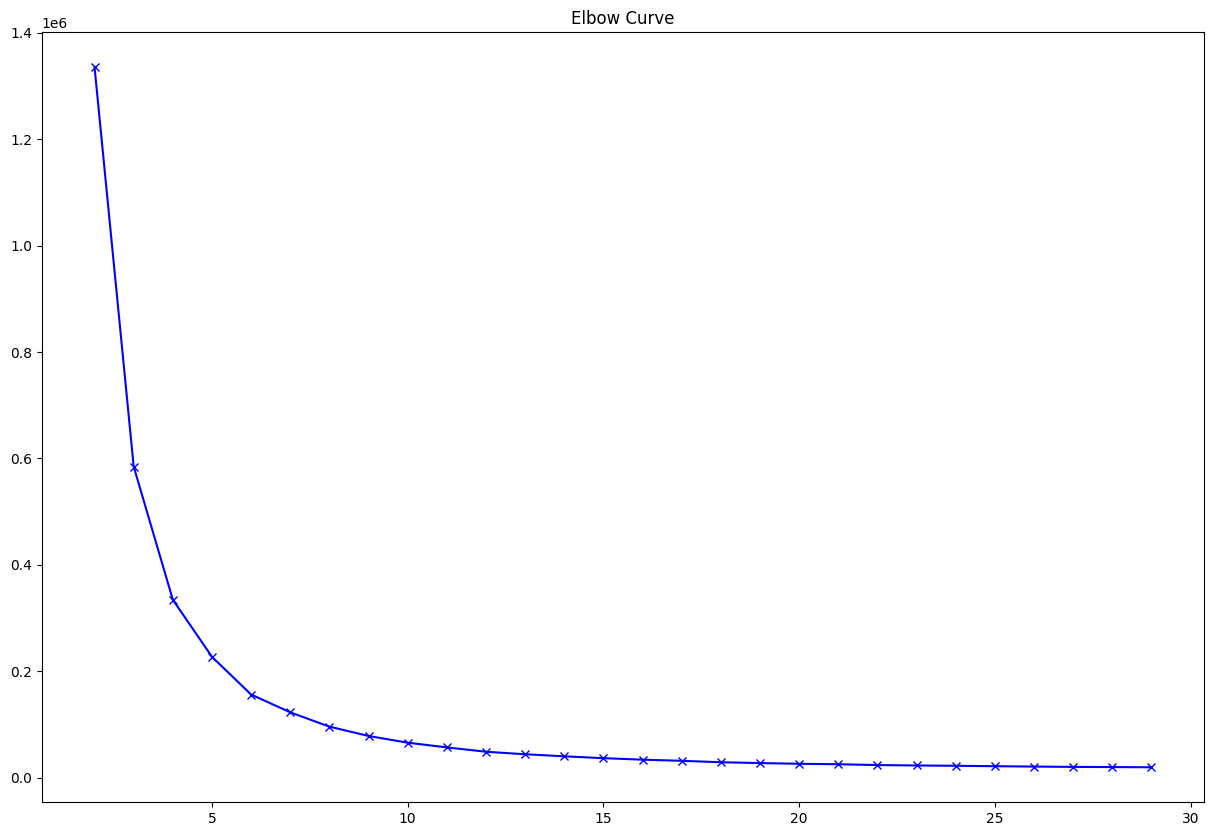

In [ ]:
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

In [ ]:
#Computing K means with K = 5, thus, taking it as 5 clusters
centroids, _ = kmeans(data, 5)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

idx

array([1, 4, 2, ..., 1, 3, 3], dtype=int32)

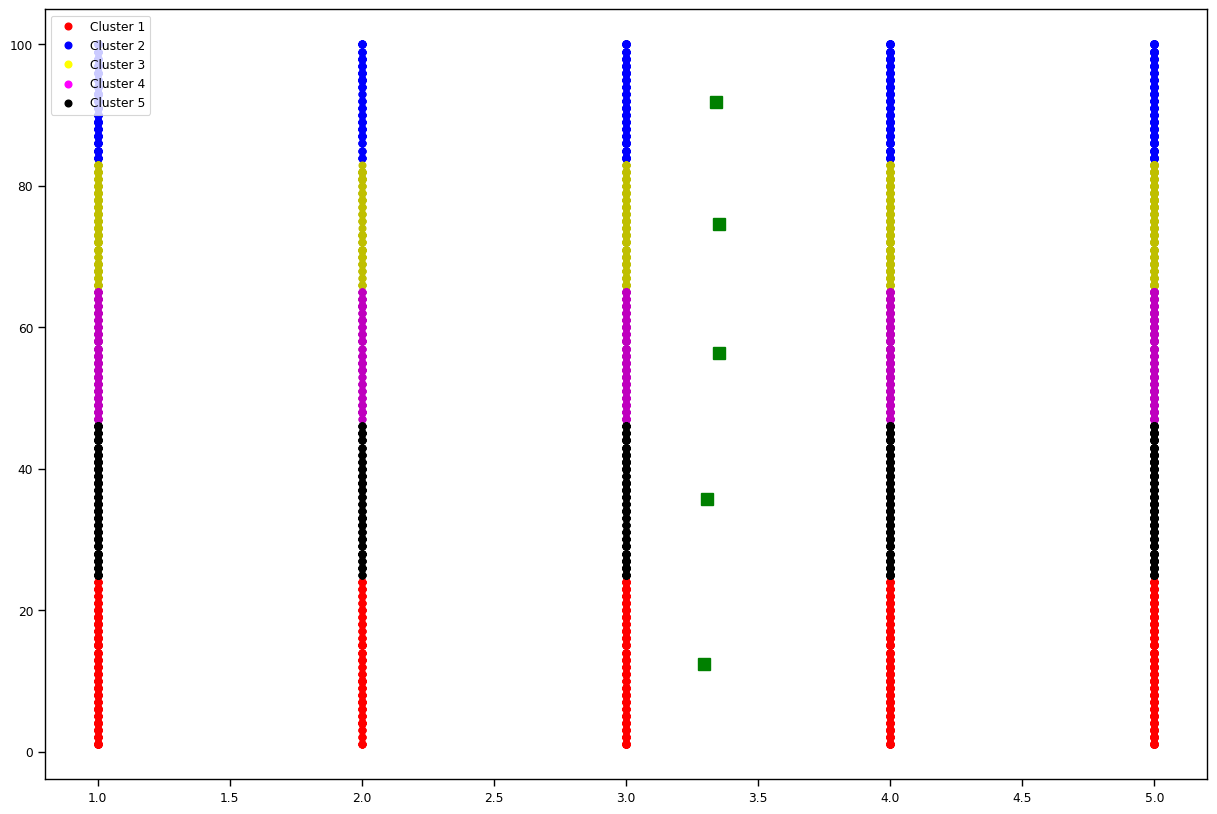

In [ ]:
# some plotting using numpy's logical indexing
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )


circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )
plt.show()


In [ ]:
def segregation(data):
    values = []
    for val in data.Rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values


In [ ]:
df['Ratings_Dist'] = segregation(df)

6292


In [ ]:
df

,id,Book_Name,Writer_Name,Category,Rating,Review,Site,sentiment,label,Book_name_without_spaces,ratings_count,Ratings_Dist
0,96523,মুনতাখাব হাদীস,মাওলানা মোঃ সাখাওয়াত উল্লাহ,হাদিস ও সুন্নাত,1.0,(১) বই টি শত শত জাল হাদিসে ভরপুর । (২) দ্বীন ...,Rokomari,negative,0,মুনতাখাবহাদীস,98.0,Between 0 and 1
1,39118,মেঘাচ্ছন্ন ঈমান (পেপারব্যাক),শাইখ আব্দুল মালিক আল কাসিম,"ঈমান, আক্বিদা ও তাওবাহ",1.0,"বই রিভিউ : মেঘাচ্ছন্ন ঈমান পাঠ অনুভূতি: ""একটি...",Rokomari,negative,0,মেঘাচ্ছন্নঈমান(পেপারব্যাক),27.0,Between 0 and 1
2,141682,সামষ্টিক অর্থনীতি (পার্স কোর্স দ্বিতীয় বর্ষের...,সুকেশ চন্দ্র জোয়ারদার,ডিগ্রি,1.0,পড়তে চাই,Rokomari,negative,0,সামষ্টিকঅর্থনীতি(পার্সকোর্সদ্বিতীয়বর্ষের-৩য়পত্...,75.0,Between 0 and 1
3,136770,ছাত্রলীগের ইতিহাস বাংলাদেশের ইতিহাস (১৯৪৮-১৯৭...,সাইফুর রহমান সোহাগ,প্রসঙ্গ: বাংলাদেশের রাজনীতি,1.0,ঠিক আছে,Rokomari,negative,0,ছাত্রলীগেরইতিহাসবাংলাদেশেরইতিহাস(১৯৪৮-১৯৭০প্রথ...,51.0,Between 0 and 1
4,82740,"এসএসসি বিজ্ঞান মেইড ইজি প্রশ্নপত্র, সকল শিক্ষ...",পাঞ্জেরী সম্পাদনা পর্ষদ (সম্পাদক),নবম ও দশম (এসএসসি): বিজ্ঞান বিভাগ পাঠ্য সহায়...,1.0,এটি এসএসসি শিক্ষার্থীর 2020 এর জন্য একটি পরীক্...,Rokomari,negative,0,"এসএসসিবিজ্ঞানমেইডইজিপ্রশ্নপত্র,সকলশিক্ষাবোর্ড,...",77.0,Between 0 and 1
...,...,...,...,...,...,...,...,...,...,...,...,...
6287,21943,"তিমির প্রেম, সপ্ত আতঙ্ক, লর্না ডুন (পেপারব্যা...",আর. ডি. ব্ল্যাকমোর,"রহস্য, গোয়েন্দা, ভৌতিক, মিথ, থ্রিলার, ও অ্যাড...",5.0,এই সংগ্রহটি তিনটি দুর্দান্ত ক্লাসিক উপন্যাস নি...,Rokomari,positive,2,"তিমিরপ্রেম,সপ্তআতঙ্ক,লর্নাডুন(পেপারব্যাক)তিনটি...",33.0,Between 4 and 5
6288,51194,Guinness World Records 2020 (Hardcover),Guinness World Records (Editor),"Foreign Language Books: Essay, Articles & Res...",5.0,ভাল বই,Rokomari,positive,2,GuinnessWorldRecords2020(Hardcover),39.0,Between 4 and 5
6289,35327,খুন (হার্ডকভার),আহমেদ ফারুক,সমকালীন উপন্যাস,5.0,সম্পূর্ণ প্রাপ্তবয়স্কদের বই। তবে দুর্দান্ত গল...,Rokomari,positive,2,খুন(হার্ডকভার),93.0,Between 4 and 5
6290,8262,একাত্তর এবং মুক্তিযোদ্ধা পরিবার (হার্ডকভার),আওলিয়া খানম,"মুক্তিযুদ্ধের ডায়েরি, চিঠি ও স্মৃতিচারণ",5.0,"এটি ""সাহিত্য কথা"" প্রকাশনী হতে প্রকাশিত একটি অ...",Rokomari,positive,2,একাত্তরএবংমুক্তিযোদ্ধাপরিবার(হার্ডকভার),61.0,Between 4 and 5


In [ ]:
books_features = pd.concat([df['Ratings_Dist'].str.get_dummies(sep=","), df['Rating'], df['ratings_count']], axis=1)
books_features.head()

,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,Rating,ratings_count
0,1,0,0,0,0,1.0,98.0
1,1,0,0,0,0,1.0,27.0
2,1,0,0,0,0,1.0,75.0
3,1,0,0,0,0,1.0,51.0
4,1,0,0,0,0,1.0,77.0


In [ ]:
books_features.shape

(6292, 7)

In [ ]:
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)

In [ ]:
np.round(books_features, 2)

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.98],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.26],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.75],
       ...,
       [0.  , 0.  , 0.  , ..., 1.  , 1.  , 0.93],
       [0.  , 0.  , 0.  , ..., 1.  , 1.  , 0.61],
       [0.  , 0.  , 0.  , ..., 1.  , 1.  , 0.51]])

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(books_features)
distance, indices = model.kneighbors(books_features)

In [ ]:
def get_index_from_name(name):
    return df[df["Book_name_without_spaces"]==name].index.tolist()[0]

all_books_names = list(df.Book_name_without_spaces.values)

def get_id_from_partial_name(partial):
    for name in all_books_names:
        if partial in name:
            print(name,all_books_names.index(name))

In [ ]:
def print_similar_books(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["Book_Name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(df.iloc[id]["Book_Name"])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
features_for_clustering = df[['Rating', 'ratings_count']].values

# Specify the number of clusters (you can adjust this based on your analysis)
n_clusters = 5

# Train k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(features_for_clustering)

# Calculate silhouette score
silhouette_avg = silhouette_score(features_for_clustering, cluster_assignments)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster")
print(f"Sum of Squares (WCSS): {wcss}")

Silhouette Score: 0.5327335607525849
Within-Cluster
Sum of Squares (WCSS): 227579.44734093337


In [ ]:
name = input("Enter any text: ")
name = name.replace(" ", "")
print(print_similar_books(name))

Enter any text: মুনতাখাব হাদীস
 হু উইল ক্রাই হয়েন ইউ ডাই! (হার্ডকভার)  ব্যক্তিত্ব, আত্মপ্রত্যয়, আত্মউন্নয়ন, সুখ ও সাফল্যময় জীবন গঠনের ১০১ সূত্র   
 রোল নাম্বার শূন্য (হার্ডকভার)     
 মুনতাখাব হাদীস   
 সহীহ্‌ বঙ্গানুবাদ বোখারী শরীফ (১ থেকে ১০ খণ্ড একত্রে) (হার্ডকভার)  
 দেবতার মানবায়ন      
None


In [1]:
# Python3 code for the above approach

# Hexadecimal to binary conversion


def hex2bin(s):
	mp = {'0': "0000",
		'1': "0001",
		'2': "0010",
		'3': "0011",
		'4': "0100",
		'5': "0101",
		'6': "0110",
		'7': "0111",
		'8': "1000",
		'9': "1001",
		'A': "1010",
		'B': "1011",
		'C': "1100",
		'D': "1101",
		'E': "1110",
		'F': "1111"}
	bin = ""
	for i in range(len(s)):
		bin = bin + mp[s[i]]
	return bin

# Binary to hexadecimal conversion


def bin2hex(s):
	mp = {"0000": '0',
		"0001": '1',
		"0010": '2',
		"0011": '3',
		"0100": '4',
		"0101": '5',
		"0110": '6',
		"0111": '7',
		"1000": '8',
		"1001": '9',
		"1010": 'A',
		"1011": 'B',
		"1100": 'C',
		"1101": 'D',
		"1110": 'E',
		"1111": 'F'}
	hex = ""
	for i in range(0, len(s), 4):
		ch = ""
		ch = ch + s[i]
		ch = ch + s[i + 1]
		ch = ch + s[i + 2]
		ch = ch + s[i + 3]
		hex = hex + mp[ch]

	return hex

# Binary to decimal conversion


def bin2dec(binary):

	binary1 = binary
	decimal, i, n = 0, 0, 0
	while(binary != 0):
		dec = binary % 10
		decimal = decimal + dec * pow(2, i)
		binary = binary//10
		i += 1
	return decimal

# Decimal to binary conversion


def dec2bin(num):
	res = bin(num).replace("0b", "")
	if(len(res) % 4 != 0):
		div = len(res) / 4
		div = int(div)
		counter = (4 * (div + 1)) - len(res)
		for i in range(0, counter):
			res = '0' + res
	return res

# Permute function to rearrange the bits


def permute(k, arr, n):
	permutation = ""
	for i in range(0, n):
		permutation = permutation + k[arr[i] - 1]
	return permutation

# shifting the bits towards left by nth shifts


def shift_left(k, nth_shifts):
	s = ""
	for i in range(nth_shifts):
		for j in range(1, len(k)):
			s = s + k[j]
		s = s + k[0]
		k = s
		s = ""
	return k

# calculating xow of two strings of binary number a and b


def xor(a, b):
	ans = ""
	for i in range(len(a)):
		if a[i] == b[i]:
			ans = ans + "0"
		else:
			ans = ans + "1"
	return ans


# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
				60, 52, 44, 36, 28, 20, 12, 4,
				62, 54, 46, 38, 30, 22, 14, 6,
				64, 56, 48, 40, 32, 24, 16, 8,
				57, 49, 41, 33, 25, 17, 9, 1,
				59, 51, 43, 35, 27, 19, 11, 3,
				61, 53, 45, 37, 29, 21, 13, 5,
				63, 55, 47, 39, 31, 23, 15, 7]

# Expansion D-box Table
exp_d = [32, 1, 2, 3, 4, 5, 4, 5,
		6, 7, 8, 9, 8, 9, 10, 11,
		12, 13, 12, 13, 14, 15, 16, 17,
		16, 17, 18, 19, 20, 21, 20, 21,
		22, 23, 24, 25, 24, 25, 26, 27,
		28, 29, 28, 29, 30, 31, 32, 1]

# Straight Permutation Table
per = [16, 7, 20, 21,
	29, 12, 28, 17,
	1, 15, 23, 26,
	5, 18, 31, 10,
	2, 8, 24, 14,
	32, 27, 3, 9,
	19, 13, 30, 6,
	22, 11, 4, 25]

# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
		[0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
		[4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
		[15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],

		[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
		[3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
		[0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
		[13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],

		[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
		[13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
		[13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
		[1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],

		[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
		[13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
		[10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
		[3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],

		[[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
		[14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
		[4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
		[11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],

		[[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
		[10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
		[9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
		[4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],

		[[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
		[13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
		[1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
		[6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],

		[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
		[1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
		[7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
		[2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]

# Final Permutation Table
final_perm = [40, 8, 48, 16, 56, 24, 64, 32,
			39, 7, 47, 15, 55, 23, 63, 31,
			38, 6, 46, 14, 54, 22, 62, 30,
			37, 5, 45, 13, 53, 21, 61, 29,
			36, 4, 44, 12, 52, 20, 60, 28,
			35, 3, 43, 11, 51, 19, 59, 27,
			34, 2, 42, 10, 50, 18, 58, 26,
			33, 1, 41, 9, 49, 17, 57, 25]


def encrypt(pt, rkb, rk):
	pt = hex2bin(pt)

	# Initial Permutation
	pt = permute(pt, initial_perm, 64)
	print("After initial permutation", bin2hex(pt))

	# Splitting
	left = pt[0:32]
	right = pt[32:64]
	for i in range(0, 16):
		# Expansion D-box: Expanding the 32 bits data into 48 bits
		right_expanded = permute(right, exp_d, 48)

		# XOR RoundKey[i] and right_expanded
		xor_x = xor(right_expanded, rkb[i])

		# S-boxex: substituting the value from s-box table by calculating row and column
		sbox_str = ""
		for j in range(0, 8):
			row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
			col = bin2dec(
				int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
			val = sbox[j][row][col]
			sbox_str = sbox_str + dec2bin(val)

		# Straight D-box: After substituting rearranging the bits
		sbox_str = permute(sbox_str, per, 32)

		# XOR left and sbox_str
		result = xor(left, sbox_str)
		left = result

		# Swapper
		if(i != 15):
			left, right = right, left
		print("Round ", i + 1, " ", bin2hex(left),
			" ", bin2hex(right), " ", rk[i])

	# Combination
	combine = left + right

	# Final permutation: final rearranging of bits to get cipher text
	cipher_text = permute(combine, final_perm, 64)
	return cipher_text


pt = "123456ABCD132536"
key = "AABB09182736CCDD"

# Key generation
# --hex to binary
key = hex2bin(key)

# --parity bit drop table
keyp = [57, 49, 41, 33, 25, 17, 9,
		1, 58, 50, 42, 34, 26, 18,
		10, 2, 59, 51, 43, 35, 27,
		19, 11, 3, 60, 52, 44, 36,
		63, 55, 47, 39, 31, 23, 15,
		7, 62, 54, 46, 38, 30, 22,
		14, 6, 61, 53, 45, 37, 29,
		21, 13, 5, 28, 20, 12, 4]

# getting 56 bit key from 64 bit using the parity bits
key = permute(key, keyp, 56)

# Number of bit shifts
shift_table = [1, 1, 2, 2,
			2, 2, 2, 2,
			1, 2, 2, 2,
			2, 2, 2, 1]

# Key- Compression Table : Compression of key from 56 bits to 48 bits
key_comp = [14, 17, 11, 24, 1, 5,
			3, 28, 15, 6, 21, 10,
			23, 19, 12, 4, 26, 8,
			16, 7, 27, 20, 13, 2,
			41, 52, 31, 37, 47, 55,
			30, 40, 51, 45, 33, 48,
			44, 49, 39, 56, 34, 53,
			46, 42, 50, 36, 29, 32]

# Splitting
left = key[0:28] # rkb for RoundKeys in binary
right = key[28:56] # rk for RoundKeys in hexadecimal

rkb = []
rk = []
for i in range(0, 16):
	# Shifting the bits by nth shifts by checking from shift table
	left = shift_left(left, shift_table[i])
	right = shift_left(right, shift_table[i])

	# Combination of left and right string
	combine_str = left + right

	# Compression of key from 56 to 48 bits
	round_key = permute(combine_str, key_comp, 48)

	rkb.append(round_key)
	rk.append(bin2hex(round_key))

print("Encryption")
cipher_text = bin2hex(encrypt(pt, rkb, rk))
print("Cipher Text : ", cipher_text)

print("Decryption")
rkb_rev = rkb[::-1]
rk_rev = rk[::-1]
text = bin2hex(encrypt(cipher_text, rkb_rev, rk_rev))
print("Plain Text : ", text)

# This code is contributed by Aditya Jain


Encryption
After initial permutation 14A7D67818CA18AD
Round  1   18CA18AD   5A78E394   194CD072DE8C
Round  2   5A78E394   4A1210F6   4568581ABCCE
Round  3   4A1210F6   B8089591   06EDA4ACF5B5
Round  4   B8089591   236779C2   DA2D032B6EE3
Round  5   236779C2   A15A4B87   69A629FEC913
Round  6   A15A4B87   2E8F9C65   C1948E87475E
Round  7   2E8F9C65   A9FC20A3   708AD2DDB3C0
Round  8   A9FC20A3   308BEE97   34F822F0C66D
Round  9   308BEE97   10AF9D37   84BB4473DCCC
Round  10   10AF9D37   6CA6CB20   02765708B5BF
Round  11   6CA6CB20   FF3C485F   6D5560AF7CA5
Round  12   FF3C485F   22A5963B   C2C1E96A4BF3
Round  13   22A5963B   387CCDAA   99C31397C91F
Round  14   387CCDAA   BD2DD2AB   251B8BC717D0
Round  15   BD2DD2AB   CF26B472   3330C5D9A36D
Round  16   19BA9212   CF26B472   181C5D75C66D
Cipher Text :  C0B7A8D05F3A829C
Decryption
After initial permutation 19BA9212CF26B472
Round  1   CF26B472   BD2DD2AB   181C5D75C66D
Round  2   BD2DD2AB   387CCDAA   3330C5D9A36D
Round  3   387CCDAA   22A